## 1. Analisando PIB

- PIB é a soma de todos os bens e serviços produzidos em territórios nacional

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Função generalizada para extrair dados do Banco Central do Brasil

In [48]:
def extract_bcb(code: int, initial_date: str, final_date: str) -> pd.DataFrame:
    url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{code}/dados?formato=json&dataInicial={initial_date}&dataFinal={final_date}'
    df  = pd.read_json(url)
    df.set_index('data', inplace = True)
    df.index = pd.to_datetime(df.index, dayfirst= True)
    return df


In [52]:
pib = extract_bcb(1207, '01/01/2000', '01/01/2024')

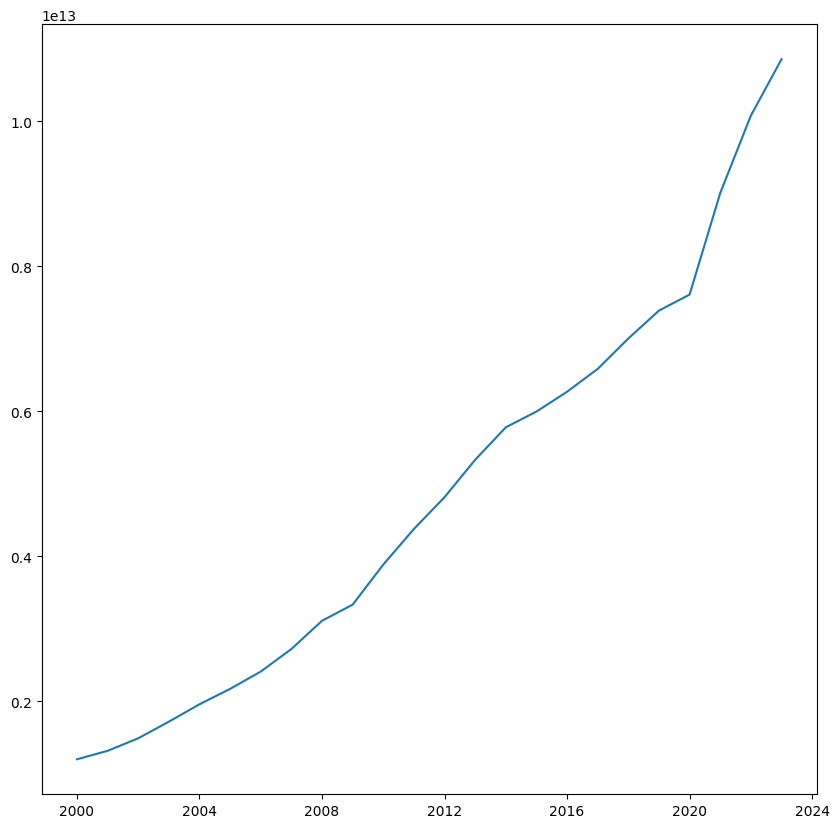

In [54]:
plt.figure(figsize = (10, 10))
plt.plot(pib);

## 2. Analisando SELIC

- Selic é a taxa básica de juros da economia definida pelo COPOM

In [56]:
selic = extract_bcb(432, '01/01/2000', '01/01/2024')

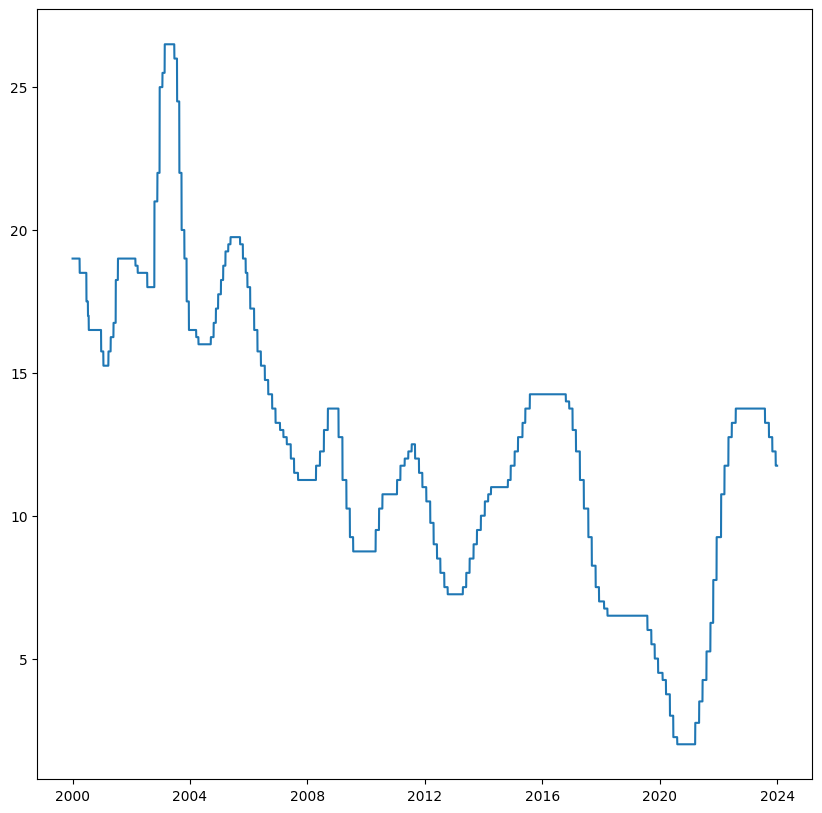

In [58]:
plt.figure(figsize = (10, 10))
plt.plot(selic);

## 3. Analisando IPCA

- Mede o poder de compra da população e acompanha o nível de preços de diversos segmentos de consumo

In [59]:
ipca = extract_bcb(13522, '01/01/2000', '01/01/2024')

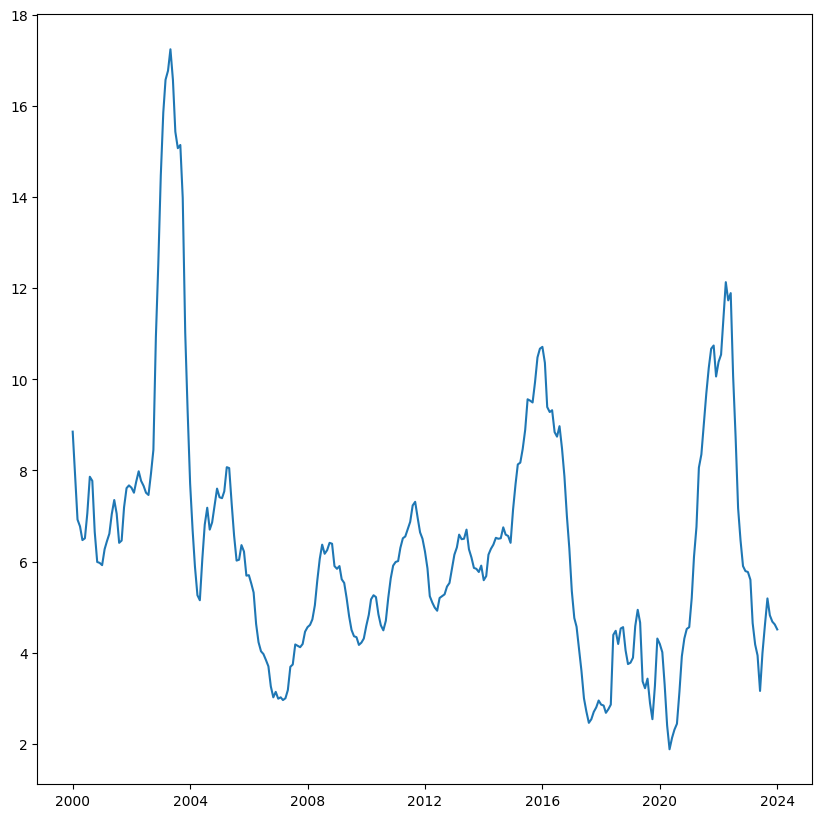

In [61]:
plt.figure(figsize = (10, 10))
plt.plot(ipca);

## 4.  Dólar

- Moeda estrangeira de reserva, reflete o humor do investidor estrangeiro em relação ao risco do país e também o saldo da balança comercial

In [62]:
dolar = extract_bcb(10813, '01/01/2000', '01/01/2024')

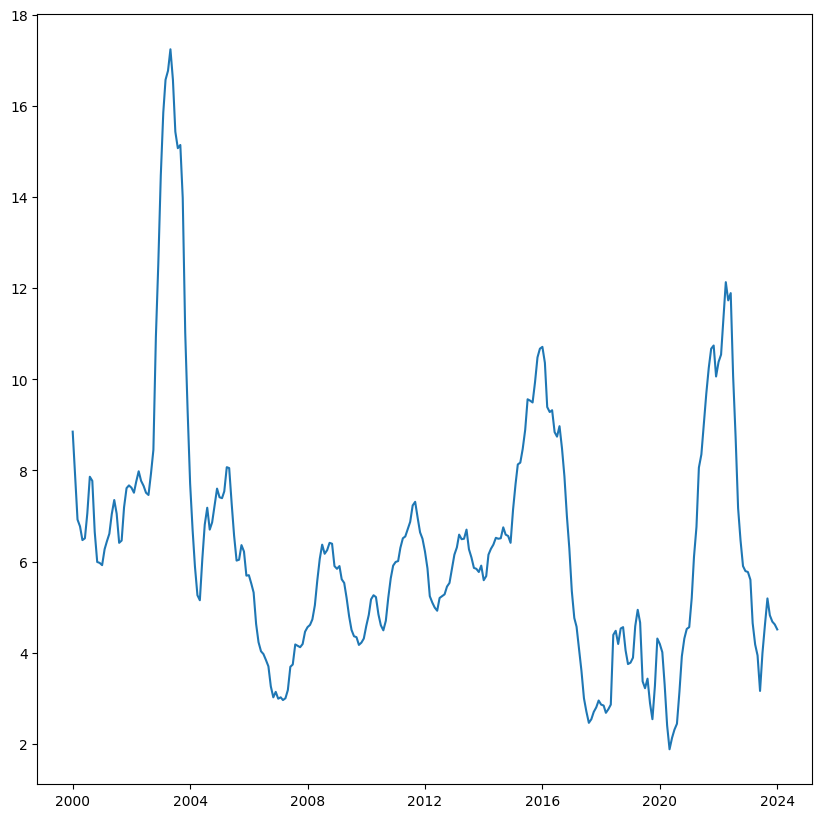

In [63]:
plt.figure(figsize = (10, 10))
plt.plot(ipca);

## 5. Cruzar Dados

- Análises cruzando séries temporais em um gráfico com eixo secundário

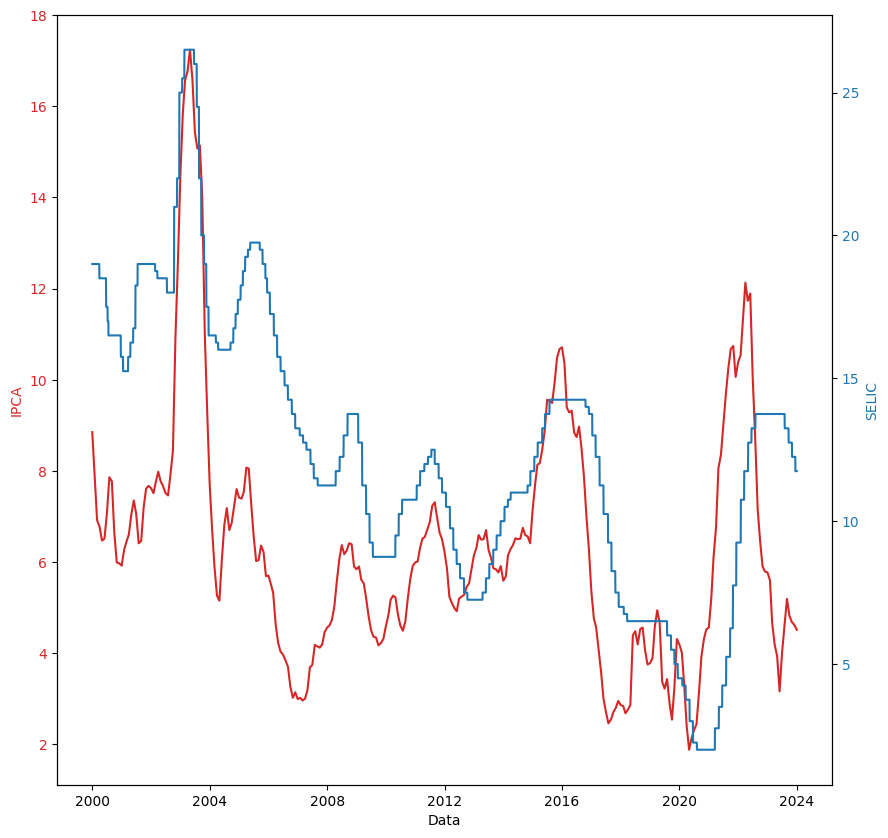

In [64]:
fig, ax1 = plt.subplots(figsize = (10, 10))

color_ipca = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel('IPCA', color = color_ipca)
ax1.plot(ipca, color = color_ipca)
ax1.tick_params(axis = 'y', labelcolor = color_ipca)

ax2 = ax1.twinx()
color_selic = 'tab:blue'
ax2.set_ylabel('SELIC', color = color_selic)
ax2.plot(selic, color = color_selic)
ax2.tick_params(axis = 'y', labelcolor = color_selic)

plt.show()
